# PW 1 - Markovian models  Manel WAFRA
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [2]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

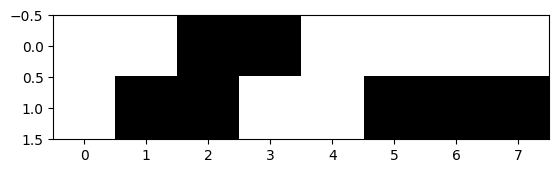

In [2]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1

On a U(x) = 10 $\beta$


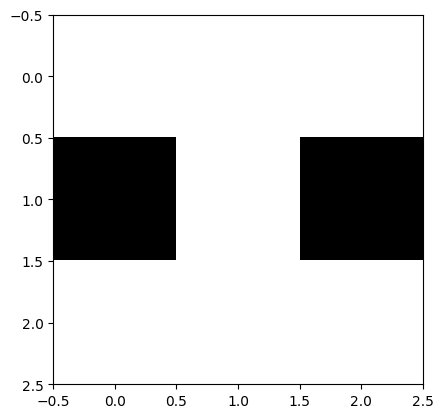

In [3]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2


Après calculs ( voir feuille manuscrite):

P(xs = 0 | (0,1,0,1)) = $\frac{\exp(-6\beta)}{\exp(-6\beta) + \exp(-2\beta)}$

P(xs = 1 | (0,1,0,1)) = $\frac{\exp(-2\beta)}{\exp(-6\beta) + \exp(-2\beta)}$

La classe la plus probable est donc la classe 1.

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



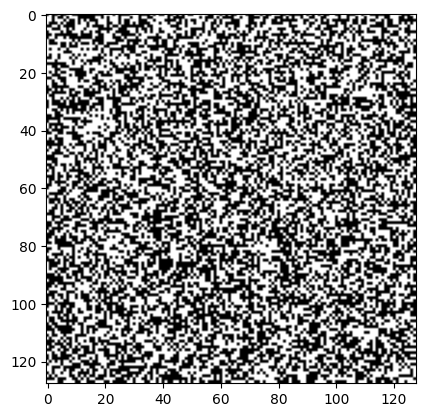

In [3]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))


plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [4]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;
    #im_bin_copy = im_bin.astype(np.uint8)

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            s = im_bin[i1,j]+im_bin[i2,j]+im_bin[i,j1]+im_bin[i,j2]
            Ureg0= beta_reg*s
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= beta_reg*(4-s)
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

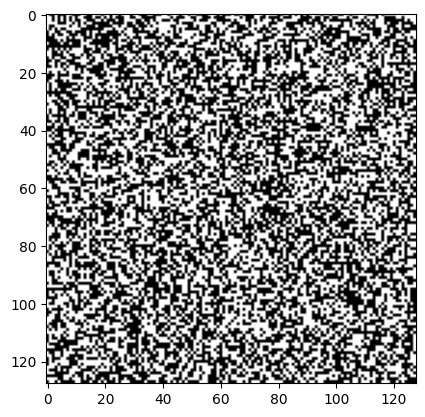

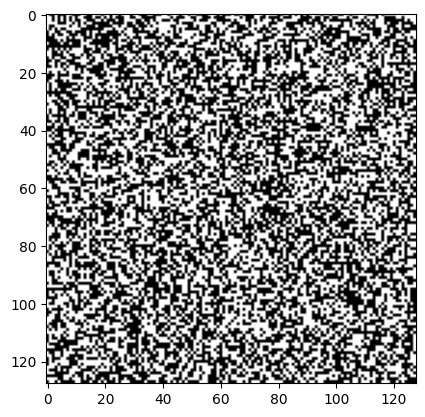

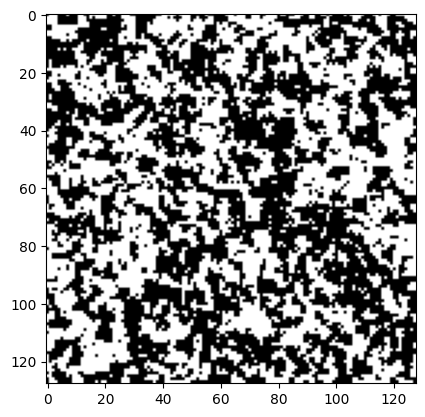

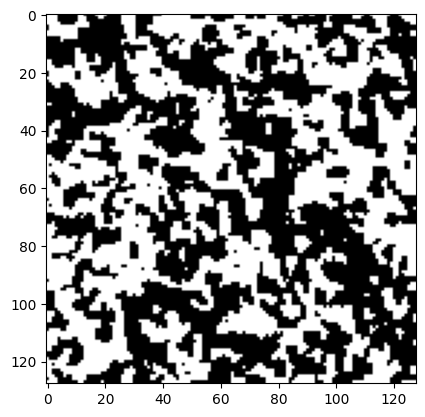

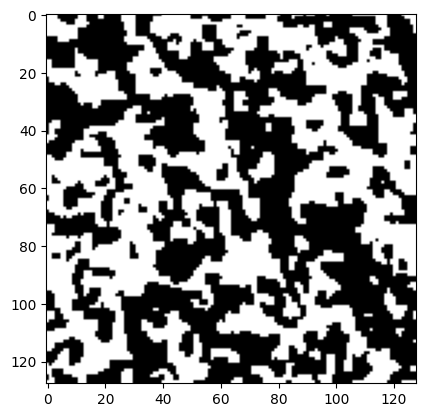

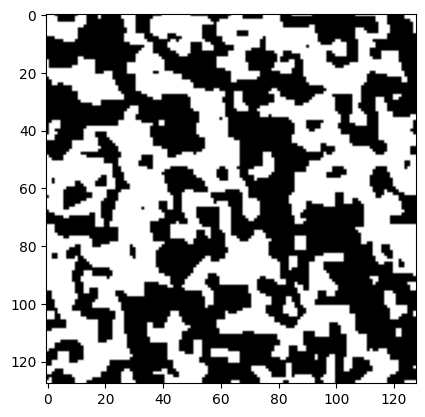

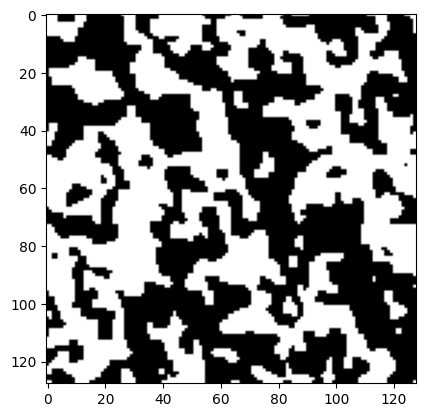

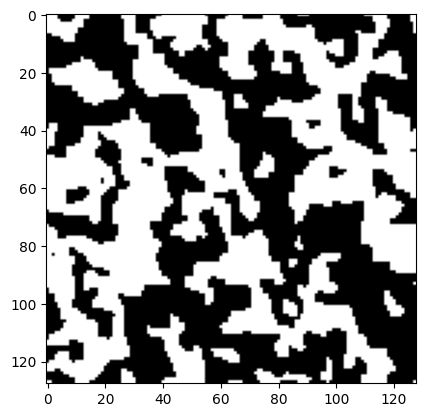

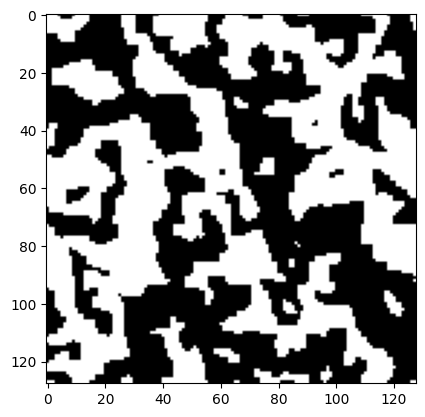

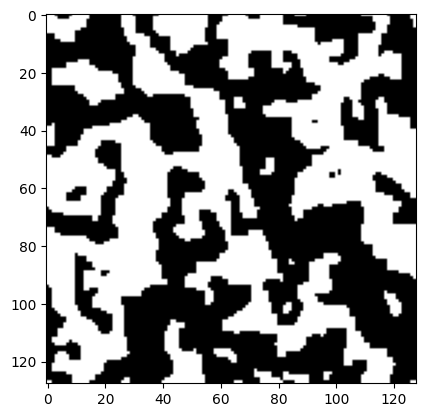

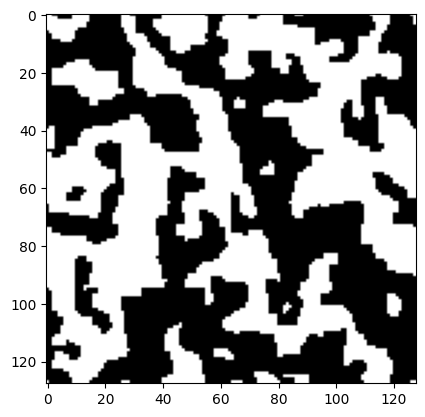

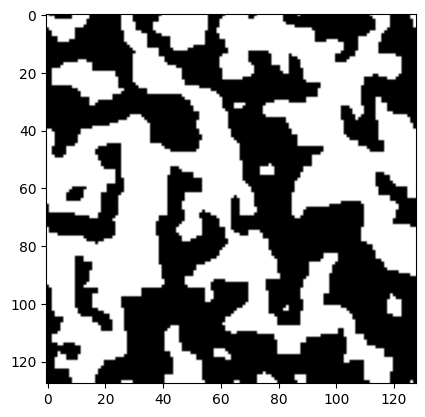

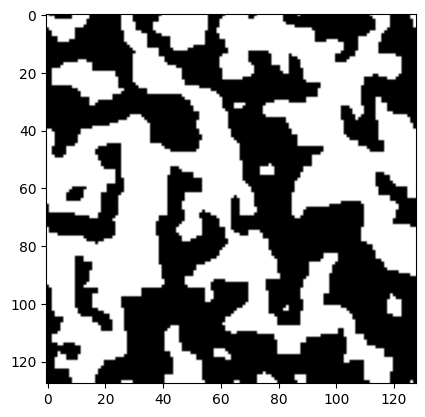

In [5]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 5

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3

On n'obtient pas la même image, ce qui est normal puisqu'on utilise un test aléatoire random.uniform. 

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

#A4

Pour un $\beta$ proche de 0.5, on obtient un résultat proche de l'image initiale avec de nombreuses petites tâches. Plus on augmente $\beta$, plus on observe la formation de grandes zones noires et blanches.

#Q5
Which image minimizes the overall energy for this model?

L'image qui minimiserait l'énergie pour ce modèle serait une image toute blanche ou toute noire.

#A5


#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

#A6

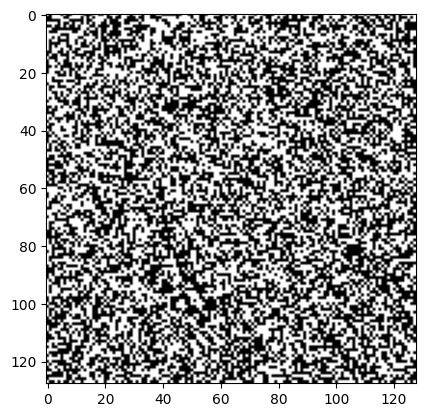

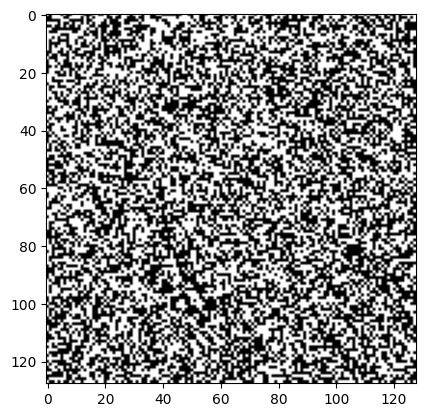

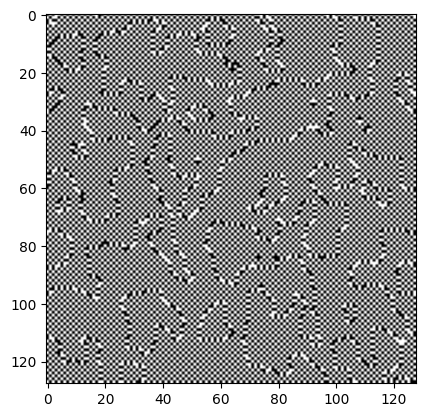

In [23]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= -2

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

On obtient un fond damé ( de plus en plus en augmentant la valeur absolue de $\beta$ ). En effet avec un $\beta$ négatif ce sont les transitions ( noir vers blanc  ou l'inverse) qui minimisent l'énergie et qui sont donc favorisées.


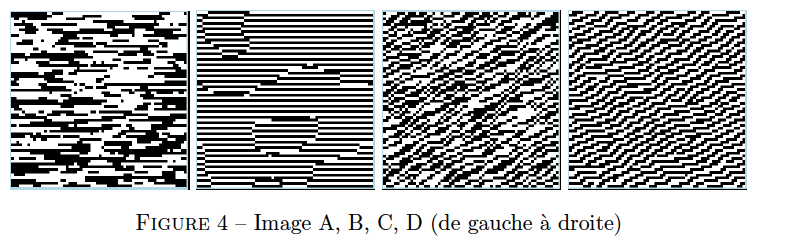

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





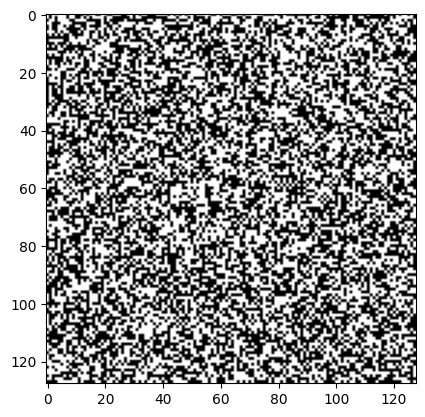

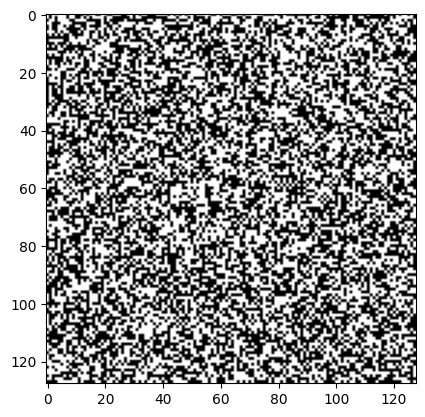

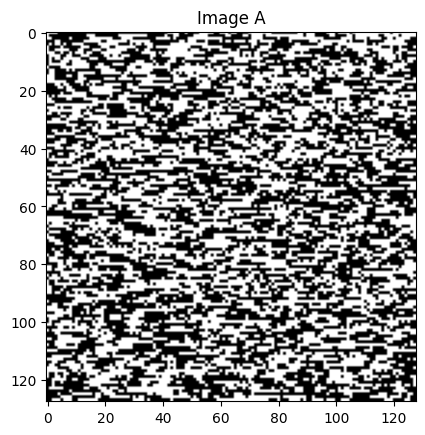

In [27]:
#image A

def echan_A(im_bin,beta_reg):

    i=0;
    j=0;
    #im_bin_copy = im_bin.astype(np.uint8)

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            s = im_bin[i,j1]+im_bin[i,j2]
            Ureg0= beta_reg*(2-s)
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= beta_reg*s
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= -1

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(100):
    echan_A(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()

plt.title("Image A")
plt.imshow(im_bin)
plt.show()



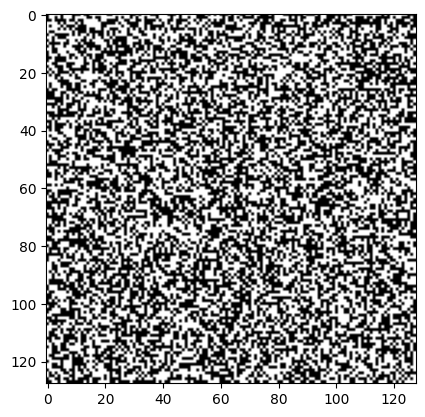

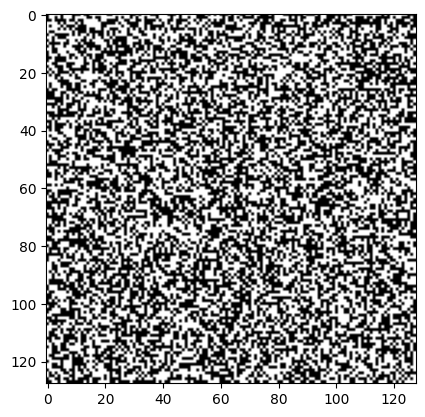

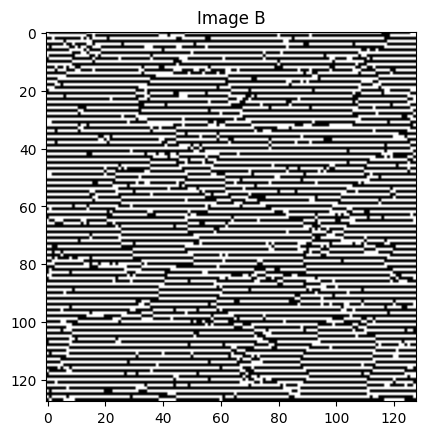

In [28]:
#image B

def echan_A(im_bin,beta_reg):

    i=0;
    j=0;
    #im_bin_copy = im_bin.astype(np.uint8)

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            s1 = im_bin[i,j1]+im_bin[i,j2]
            s2 = im_bin[i1,j]+im_bin[i2,j]
            Ureg0= beta_reg1*(2-s1) + beta_reg2*(2-s2)
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= beta_reg1*s1 + beta_reg2*s2
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg1= -1
beta_reg2=1

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(100):
    echan_A(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()

plt.title("Image B")
plt.imshow(im_bin)
plt.show()


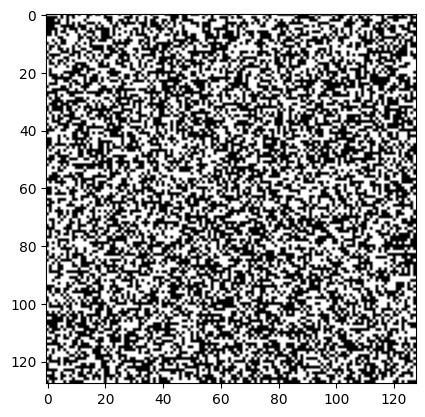

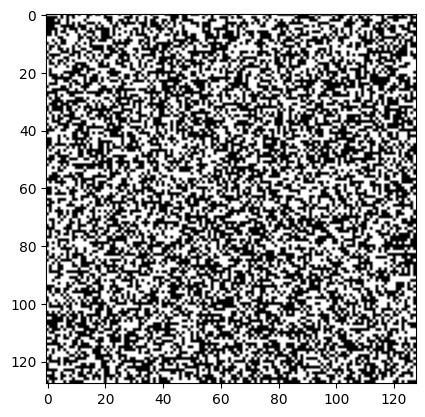

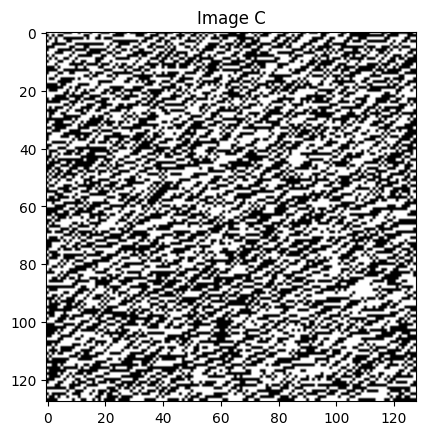

In [29]:
#image C


def echan_C(im_bin,beta_reg):

    i=0;
    j=0;
    #im_bin_copy = im_bin.astype(np.uint8)

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]


        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            s1 = im_bin[i,j1]+im_bin[i,j2]
            s2 = im_bin[i1,j]+im_bin[i2,j]
            s3 = im_bin[i1,j2]+im_bin[i2,j1]
            Ureg0= beta_reg1*(4-s1-s3) + beta_reg2*(2-s2)
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= beta_reg1*(s1+s3) + beta_reg2*s2
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg1= -1
beta_reg2=1

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(100):
    echan_C(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()

plt.title("Image C")
plt.imshow(im_bin)
plt.show()

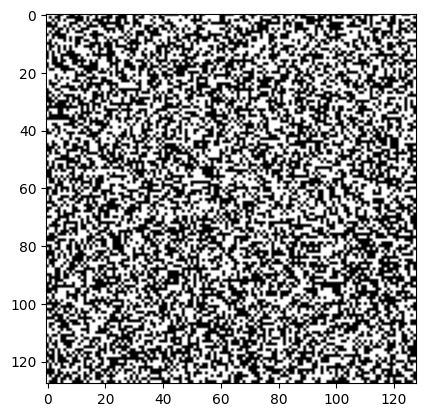

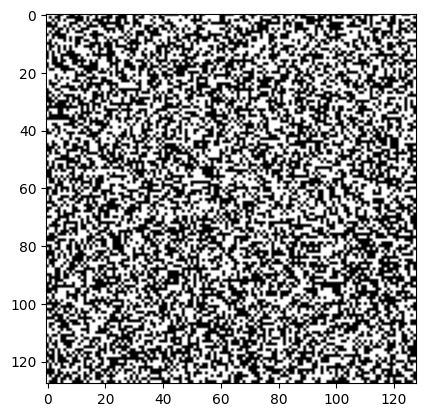

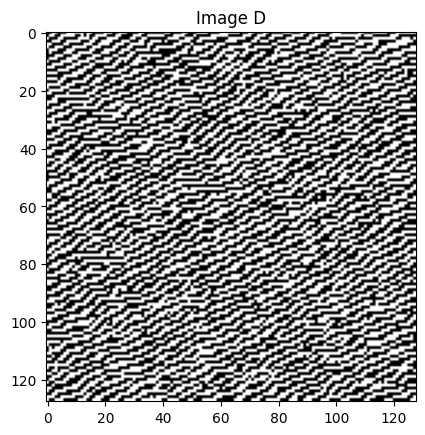

In [30]:
#image D




def echan_D(im_bin,beta_reg):

    i=0;
    j=0;
    #im_bin_copy = im_bin.astype(np.uint8)

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]


        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            s1 = im_bin[i,j1]+im_bin[i,j2]
            s2 = im_bin[i1,j]+im_bin[i2,j]
            s3 = im_bin[i1,j2]+im_bin[i2,j1] #pixels sur la diag + pi/4
            s4 = im_bin[i1,j1]+im_bin[i2,j2] #pixels sur la diag + 3pi/4
            Ureg0= beta_reg1*(4-s1-s3) + beta_reg2*(4-s2-s4)
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= beta_reg1*(s1+s3) + beta_reg2*(s2+s4)
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg1= -1
betag_reg2=1

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(100):
    echan_D(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()

plt.title("Image D")
plt.imshow(im_bin)
plt.show()



* Pour l'image A: on veut favoriser l'absence de transition dans la direction horizontale pour avoir les lignes donc on a

les "cliques potentials" horiz: Vc(0,0)=Vc(1,1)= -1 et le reste à 0.

* Pour l'image B: on veut favoriser encore plus les lignes horizontales. En plus de ce qui précède on veut favoriser les transitions à la verticale: on met à 1 les clique potentials à la verticales suivants:

les "cliques potentials" vertical: Vc(0,0)=Vc(1,1)= 1 

* Pour l'image C: On veut favoriser l'absence de transition dans la direction diagonale du bas vers le haut ( pi/4). En plus de ce qui précède:

les cliques potentials diagonal (+ $\pi$ /4): Vc(0,0) = Vc(1,1)= -1

* Pour l'image D: en plus de ce qui précède:

les cliques potentials diagonal (+ 3 * $\pi$ /4): Vc(0,0) = Vc(1,1)= 1




#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

#A8

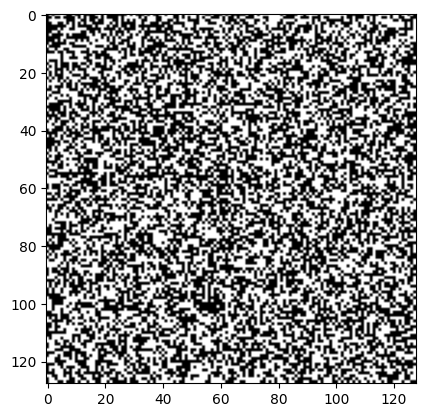

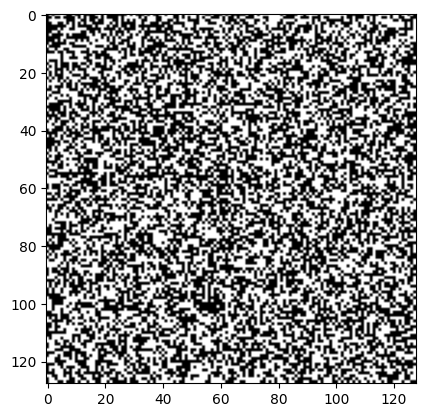

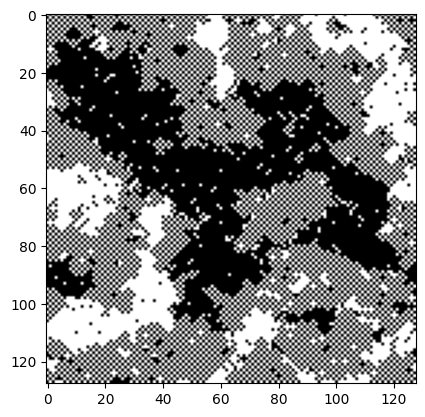

In [26]:
#programme modifié pour encourager les deux directions diagonales



def echan_D(im_bin,beta_reg):

    i=0;
    j=0;
    #im_bin_copy = im_bin.astype(np.uint8)

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]


        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            s1 = im_bin[i,j1]+im_bin[i,j2]
            s2 = im_bin[i1,j]+im_bin[i2,j]
            s3 = im_bin[i1,j2]+im_bin[i2,j1] #pixels sur la diag + pi/4
            s4 = im_bin[i1,j1]+im_bin[i2,j2] #pixels sur la diag + 3pi/4
            Ureg0= beta_reg*(4-s3-s4)
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= beta_reg*(s3+s4)
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= -1

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(100):
    echan_D(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()


On a favorisé les deux directions diagonales. On obtient des zones soit quadrillées soit toutes blanches soit toute noires. 